In [1]:
from functools import reduce

import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import qutip as qt
from qutip.qip.algorithms.qft import qft

In [2]:
q = qft(2).full()
q_dag = qft(2).inv().full()

p2 = np.diag(np.square([0, np.pi/2, np.pi, -np.pi/2]))

https://arxiv.org/pdf/1202.1536.pdf

In [3]:
K = q @ p2 @ q_dag
V = np.diag([10, -10, 10, -10])

In [4]:
def total_coeff_diff(eH, eH_Trot):
    a = np.ndarray.flatten(np.abs(eH * qt.basis(4, 1)))
    b = np.ndarray.flatten(np.abs(eH_Trot * qt.basis(4, 1)))
    return sum(abs(a - b))

([<matplotlib.axis.XTick at 0x121600f10>,
 [Text(0, 0, '0'), Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3')])

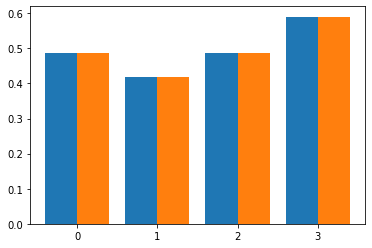

In [5]:
dt = 1/10
eH = sc.linalg.expm(-1j * K)
eH_Trot_1 = sc.linalg.expm(-1j * dt * K)
eH_Trot = reduce(np.matmul, [eH_Trot_1] * 10)

plt.bar([x - 0.2 for x in range(4)], np.ndarray.flatten(np.abs(eH * qt.basis(4, 1))), width=0.4)
plt.bar([x + 0.2 for x in range(4)], np.ndarray.flatten(np.abs(eH_Trot * qt.basis(4, 1))), width=0.4)
plt.xticks(range(4), range(4))

([<matplotlib.axis.XTick at 0x123723c70>,
 [Text(0, 0, '0'), Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3')])

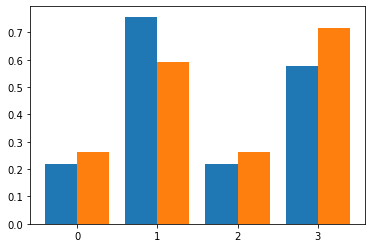

In [6]:
dt = 1/10
eH = sc.linalg.expm(-1j * (K + V))
eH_Trot_1 = sc.linalg.expm(-1j * dt * V) @ sc.linalg.expm(-1j * dt * K)
eH_Trot = reduce(np.matmul, [eH_Trot_1] * 10)

plt.bar([x - 0.2 for x in range(4)], np.ndarray.flatten(np.abs(eH * qt.basis(4, 1))), width=0.4)
plt.bar([x + 0.2 for x in range(4)], np.ndarray.flatten(np.abs(eH_Trot * qt.basis(4, 1))), width=0.4)
plt.xticks(range(4), range(4))

Text(0.5, 0, 'Num Trotterization Steps')

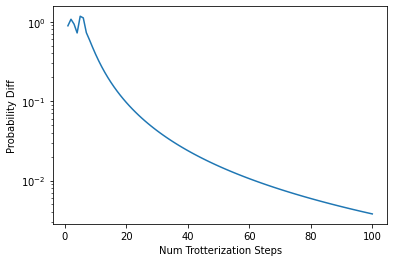

In [7]:
diffs = []
num_steps = range(100, 0, -1)
for steps in num_steps:
    dt = 1/steps
    eH = sc.linalg.expm(-1j * (K + V))
    eH_Trot_1 = sc.linalg.expm(-1j * dt * V) @ sc.linalg.expm(-1j * dt * K)
    eH_Trot = reduce(np.matmul, [eH_Trot_1] * steps)
    diffs.append(total_coeff_diff(eH, eH_Trot))
plt.plot(num_steps, diffs)
plt.yscale("log")
plt.ylabel("Probability Diff")
plt.xlabel("Num Trotterization Steps")

# Animations

The above matrices make it straightforward to generate some animations:

In [36]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [116]:
def free_particle(i):
    eH = sc.linalg.expm(-1j * 0.005 * i * (K))
    return np.ndarray.flatten(np.abs(eH * qt.basis(4, 1)))

def double_well(i):
    eH = sc.linalg.expm(-1j * 0.005 * i * (K + V))
    return np.ndarray.flatten(np.abs(eH * qt.basis(4, 1)))

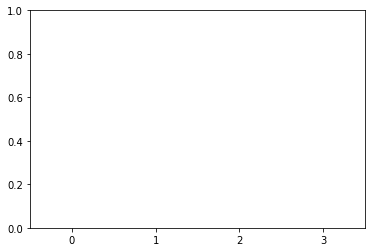

In [117]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_ylim((0, 1))
ax.set_xlim((-0.5, 3.5))
ax.set_xticks(range(4))
ax.set_xticklabels(range(4))
bars = ax.bar(range(4), 0)

In [118]:
def gen_animate(evolution):
    def animate(frameno):
        for bar, h in zip(bars, evolution(frameno)):
            bar.set_height(h)
        return bars
    return animate

In [119]:
anim = FuncAnimation(fig, gen_animate(free_particle), frames=600, interval=20, blit=True, repeat=False)
HTML(anim.to_html5_video())

In [120]:
anim = FuncAnimation(fig, gen_animate(double_well), frames=600, interval=20, blit=True, repeat=False)
HTML(anim.to_html5_video())

In [121]:
np.linalg.eig(K+V)[1][:,0]

array([0.16065988+2.03227168e-17j, 0.68861339+0.00000000e+00j,
       0.16065988+9.25524992e-18j, 0.68861339-8.18309925e-17j])